<font size = 5>Problem Statement

Yulu, India’s leading micro-mobility service provider, has recently experienced a notable decline in its revenue. This downturn raises concerns about the underlying factors influencing the demand for its shared electric cycles. Despite a well-established network of Yulu zones across major urban touchpoints, the company lacks clarity on which variables most significantly drive usage. Understanding these demand drivers is essential to reverse the revenue dip and inform strategic decision-making.

<font size = 5>Objective

The objective of this case study is to identify and analyze the key variables that significantly impact the demand for Yulu’s shared electric cycles in the Indian market. The study aims to:

 * Determine the most influential factors affecting electric cycle demand.

 * Quantify the relationship between these variables and usage patterns.

 * Evaluate how well these variables predict fluctuations in demand.

 * Provide actionable insights to guide operational, marketing, and strategic interventions aimed at boosting ridership and revenue.

<font size = 5>Column Profiling:

 * datetime: datetime
 * season: season (1: spring, 2: summer, 3: fall, 4: winter)
 * holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
 * workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

 * weather:
1. Clear, Few clouds, partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
 * temp: temperature in Celsius
 * atemp: feeling temperature in Celsius
 * humidity: humidity
 * windspeed: wind speed
 * casual: count of casual users
 * registered: count of registered users
 * count: count of total rental bikes including both casual and registered

In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loding the data and converting it to a dataframe
# URL of the CSV file
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089"

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

# Display the first 5 rows
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
print(f"Thre are {df.shape[0]} rows and")
print(f"{df.shape[1]} columns in the dataframe")

Thre are 10886 rows and
12 columns in the dataframe


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


There are no null values in the dataframe

**<font size = 4>🔍 Description of Data Cleaning and Preprocessing Steps**

* To improve readability and enable better insights during analysis, several transformations were applied to the raw dataset:

* Converted the datetime column to a proper datetime format
This enables time-based analysis (e.g., extracting hour, day, month, etc.).

* Mapped numeric codes in season to their respective categorical names
The values 1, 2, 3, and 4 were replaced with "spring", "summer", "fall", and "winter" respectively for clarity.

* Converted binary columns holiday and workingday into descriptive string labels

 * holiday: 0 → "No", 1 → "Yes"

 * workingday: 0 → "No", 1 → "Yes"

* Replaced the numeric levels in the weather column with their respective weather condition descriptions

This transformation helps interpret the data without cross-referencing the codebook.

In [ ]:
# Create a copy for transformations
df1 = df.copy()

# 1. Convert 'datetime' to datetime format
df1['datetime'] = pd.to_datetime(df1['datetime'])

# 2. Map season numbers to names
season_map = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}
df1['season'] = df1['season'].map(season_map)

# 3. Convert holiday and workingday to Yes/No
df1['holiday'] = df1['holiday'].map({0: 'No', 1: 'Yes'})
df1['workingday'] = df1['workingday'].map({0: 'No', 1: 'Yes'})

# 4. Map weather conditions
weather_map = {
    1: 'Clear, Few clouds, partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog'
}
df1['weather'] = df1['weather'].map(weather_map)

# Check the updated dataframe
df1.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,No,No,"Clear, Few clouds, partly cloudy",9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,No,No,"Clear, Few clouds, partly cloudy",9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,No,No,"Clear, Few clouds, partly cloudy",9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,No,No,"Clear, Few clouds, partly cloudy",9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,No,No,"Clear, Few clouds, partly cloudy",9.84,14.395,75,0.0,0,1,1


<font size = 5>🧾 Feature Binning for Enhanced Interpretability

To simplify analysis and improve interpretability, continuous environmental features — namely temp, atemp, humidity, and windspeed — were transformed into categorical bins based on meaningful, integer-based intervals. This binning approach makes patterns easier to detect, aids in visualizations, and supports modeling that benefits from categorized input variables.

🔹 **Temperature Features (temp and atemp):**
Both features were binned into four intervals: 0–15, 16–25, 26–35, and 36+.

These ranges represent low, moderate, high, and very high temperature zones, helping to better understand how temperature variations influence bike demand.

Original continuous values were replaced with these range labels and converted to categorical data types.

**🔹 Humidity:**
Binned into five detailed ranges: 0–20, 21–40, 41–60, 61–80, and 81–100.

This fine-grained segmentation enables clearer insights into how varying humidity levels affect user behavior.

**🔹 Windspeed:**
Binned into six precise intervals: 0–10, 11–20, 21–30, 31–40, 41–50, and 51–60

These smaller bin sizes allow for a more nuanced understanding of how different windspeed levels correlate with usage patterns.

Overall, this transformation of continuous data into interpretable, categorical intervals enhances the clarity of exploratory data analysis and lays the foundation for improved model performance.

In [ ]:
# Define clean integer bin edges
temp_bins = [0, 15, 25, 35, 50]
temp_labels = ['0–15', '16–25', '26–35', '36+']

atemp_bins = [0, 15, 25, 35, 50]
atemp_labels = ['0–15', '16–25', '26–35', '36+']

# Apply binning
df1['temp'] = pd.cut(df1['temp'].astype(float), bins=temp_bins, labels=temp_labels, include_lowest=True)
df1['atemp'] = pd.cut(df1['atemp'].astype(float), bins=atemp_bins, labels=atemp_labels, include_lowest=True)

# Convert to categorical
df1['temp'] = df1['temp'].astype('category')
df1['atemp'] = df1['atemp'].astype('category')

In [ ]:
# Define humidity bins (0–100 with step of 20)
humidity_bins = [0, 20, 40, 60, 80, 100]
humidity_labels = ['0–20', '21–40', '41–60', '61–80', '81–100']

# Define windspeed bins (0–60 with step of 10)
windspeed_bins = [0, 10, 20, 30, 40, 50, 60]
windspeed_labels = ['0–10', '11–20', '21–30', '31–40', '41–50', '51–60']

# Apply binning
df1['humidity'] = pd.cut(df1['humidity'].astype(float), bins=humidity_bins, labels=humidity_labels, include_lowest=True)
df1['windspeed'] = pd.cut(df1['windspeed'].astype(float), bins=windspeed_bins, labels=windspeed_labels, include_lowest=True)

# Convert to categorical
df1['humidity'] = df1['humidity'].astype('category')
df1['windspeed'] = df1['windspeed'].astype('category')

<font size = 4> Statistical Summary

In [ ]:
df1.describe()

,datetime,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,367.000000,886.000000,977.000000
std,NaN,49.960477,151.039033,181.144454


In [ ]:
df1.describe(include = ['object', 'category'])

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,10886,10886,10886,10886,10886,10886,10886,10886
unique,4,2,2,4,4,4,5,6
top,winter,No,Yes,"Clear, Few clouds, partly cloudy",16–25,26–35,41–60,11–20
freq,2734,10575,7412,7192,3995,4075,3564,5052


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  category      
 6   atemp       10886 non-null  category      
 7   humidity    10886 non-null  category      
 8   windspeed   10886 non-null  category      
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), int64(3), object(4)
memory usage: 723.8+ KB


<font size = 4> **Observation**
* We don't have any null values in the given dataset
* The datset has  10886 rows and 12 columns
* Columns like casual and registered user count have outliers because of large difference between the 75 percentile value and max value.
* Winter season is the most frequent season.
* As expected most of the days are working days.
* Most frequent temperature for temp and atemp columns lies between the 16-25 and 26-35 respectively.
* Mostly humidity is between 41-60
* Most frequently wind speed ranges between 11-20 kmph

<font size = 5> Univariate Analysis

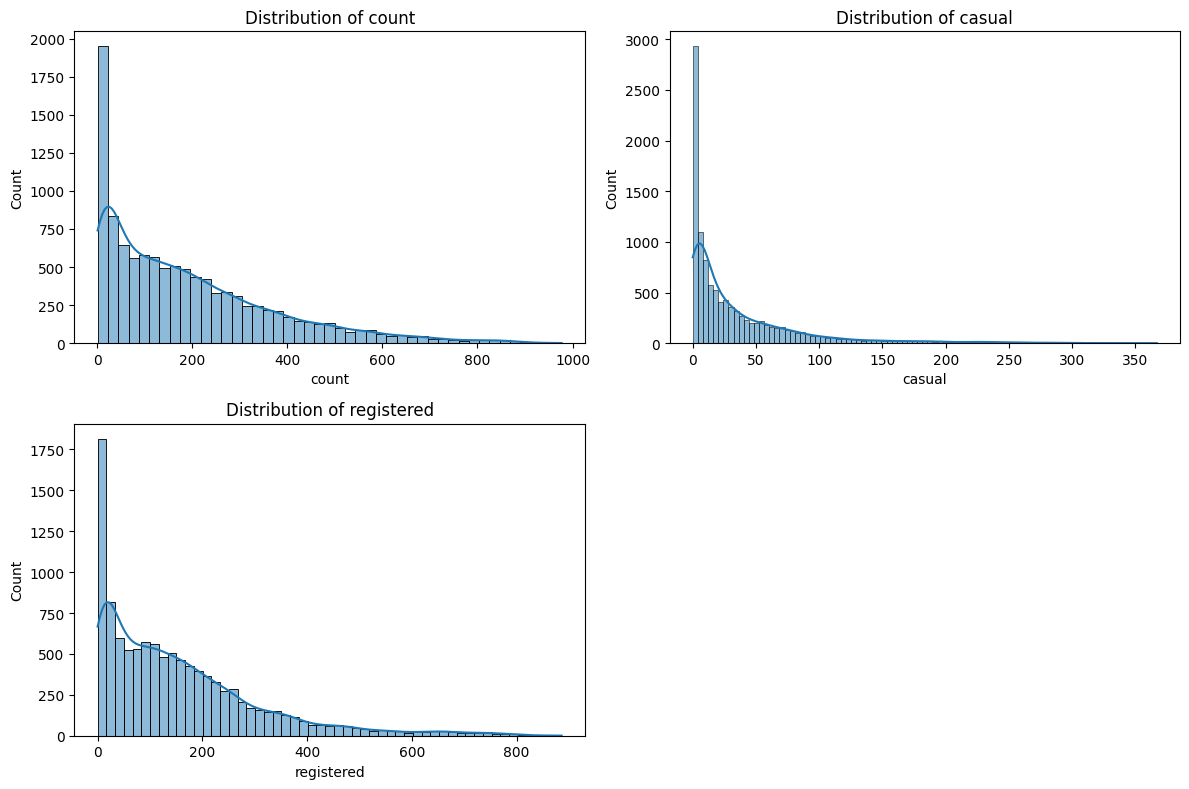

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 8))

# List of numeric columns to plot
columns = ['count','casual', 'registered']

# Loop through and plot each histogram
for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)  # rows=4, cols=2, index=i
    sns.histplot(df1[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.tight_layout()

plt.show()

<Axes: xlabel='registered'>

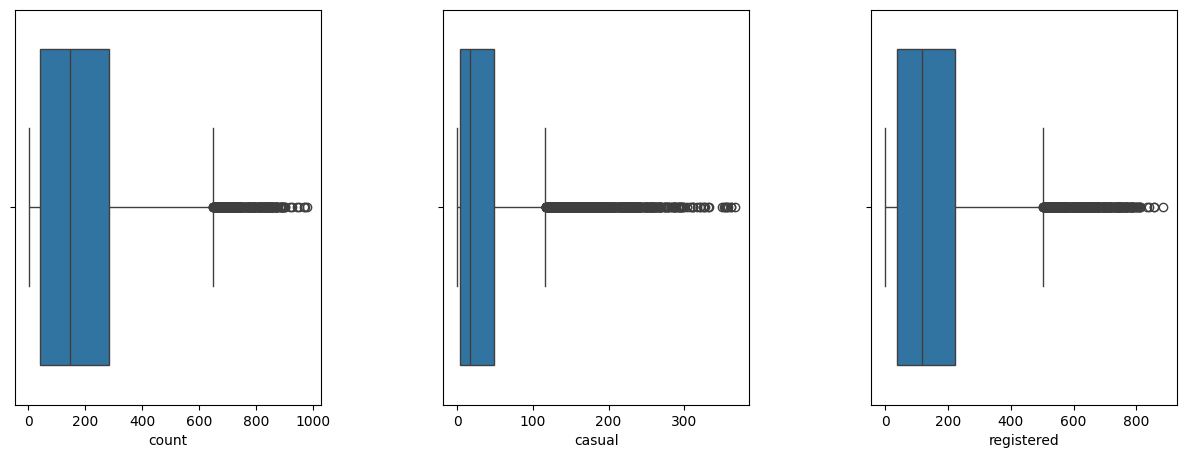

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.subplots_adjust(top=0.9, wspace=0.4)

sns.boxplot(data=df1, x="count", ax=axis[0])
sns.boxplot(data=df1, x="casual", ax=axis[1])
sns.boxplot(data=df1, x="registered", ax=axis[2])


**<font size = 4> Observation**

We can see from the box that all the 3 numerical columns have lots of outliers.

Understanding the distribution of the data for the qualitative attributes:
1. Season
2. Holiday
3. Workingday
4. weather
5. temp
6. atemp
7. humidity
8. windspeed

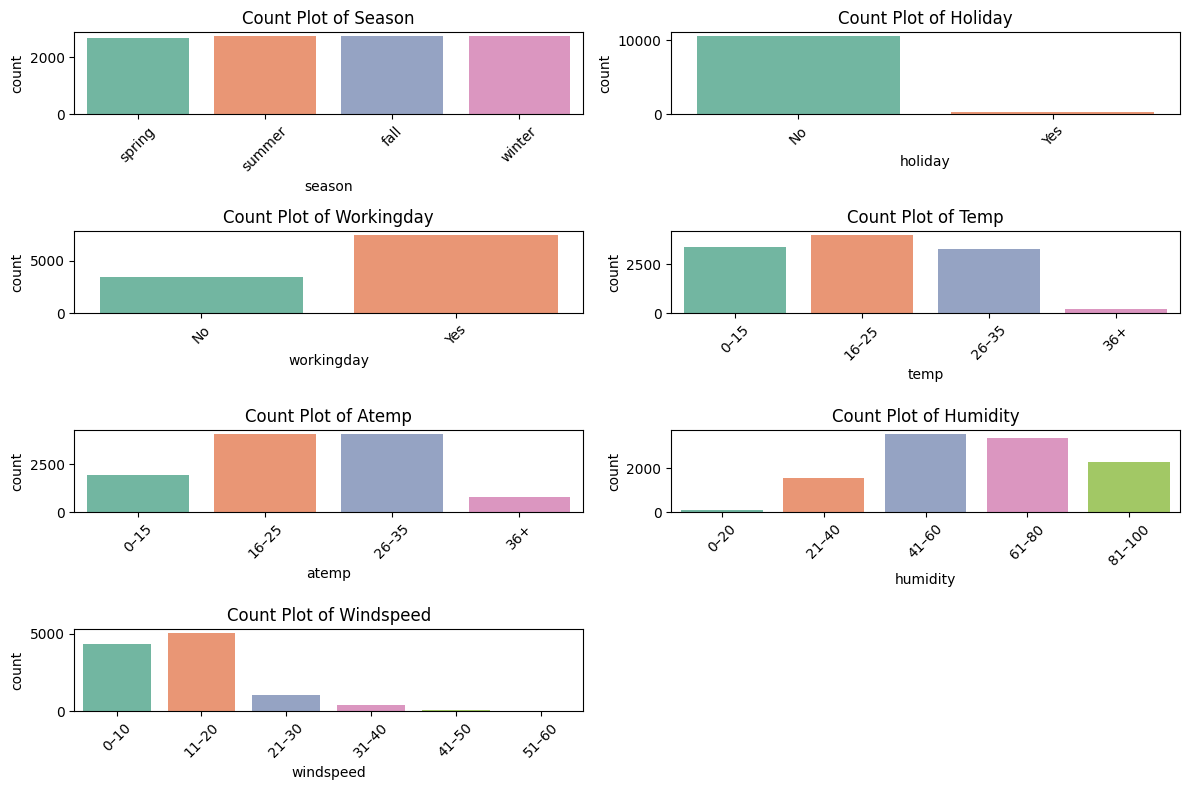

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns
cat_cols = ['season', 'holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed']

# Set figure size and layout
plt.figure(figsize=(12, 8))

# Loop through each column and create a count plot
for i, col in enumerate(cat_cols):
    plt.subplot(4, 2, i + 1)  # 4 rows, 2 columns
    sns.countplot(data=df1, x=col, palette='Set2')
    plt.title(f'Count Plot of {col.capitalize()}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


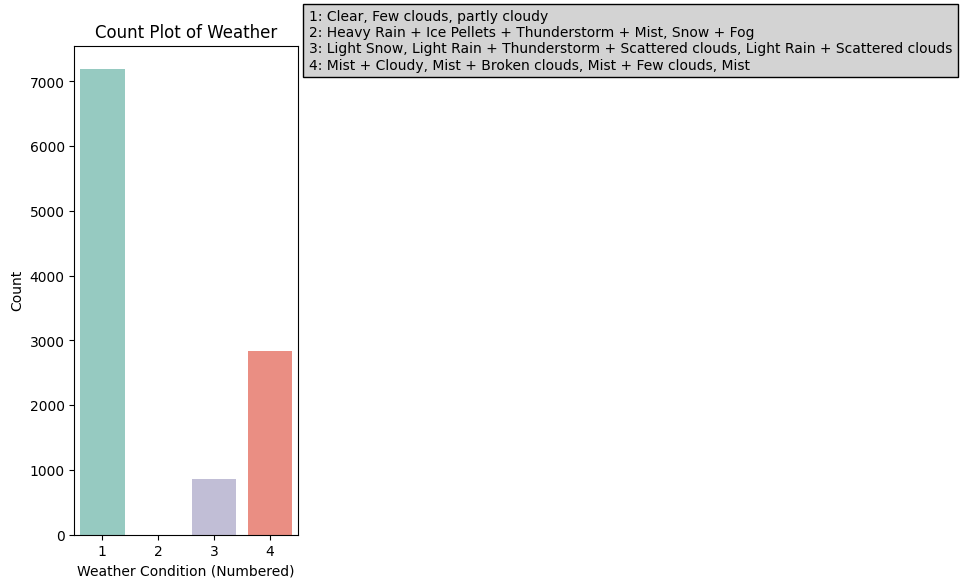

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'weather' is categorical
df1['weather'] = df1['weather'].astype('category')

# Create mapping from category to number
weather_mapping = {category: i + 1 for i, category in enumerate(df1['weather'].cat.categories)}
df1['weather_num'] = df1['weather'].map(weather_mapping)

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='weather_num', palette='Set3')
plt.title('Count Plot of Weather')
plt.xlabel('Weather Condition (Numbered)')
plt.ylabel('Count')

# Show mapping as text on side
mapping_text = '\n'.join([f"{v}: {k}" for k, v in weather_mapping.items()])
plt.text(x=3.7, y=df1['weather_num'].value_counts().max(), s=mapping_text,
         bbox=dict(facecolor='lightgrey', edgecolor='black'), fontsize=10)

plt.tight_layout()
plt.show()


<font size = 4>Observation

1. The plot indicates that the data is fairly evenly distributed across all seasons.

2. As expected, the number of working days significantly exceeds the number of holidays.

3. The majority of temperature readings fall within the range of 16°C to 35°C.

4. Humidity levels are most commonly observed between 41–60%, followed closely by 61–80%.

5. Windspeed predominantly ranges between 11 to 20 km/h.

<font size = 5> Bivariate Analysis

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

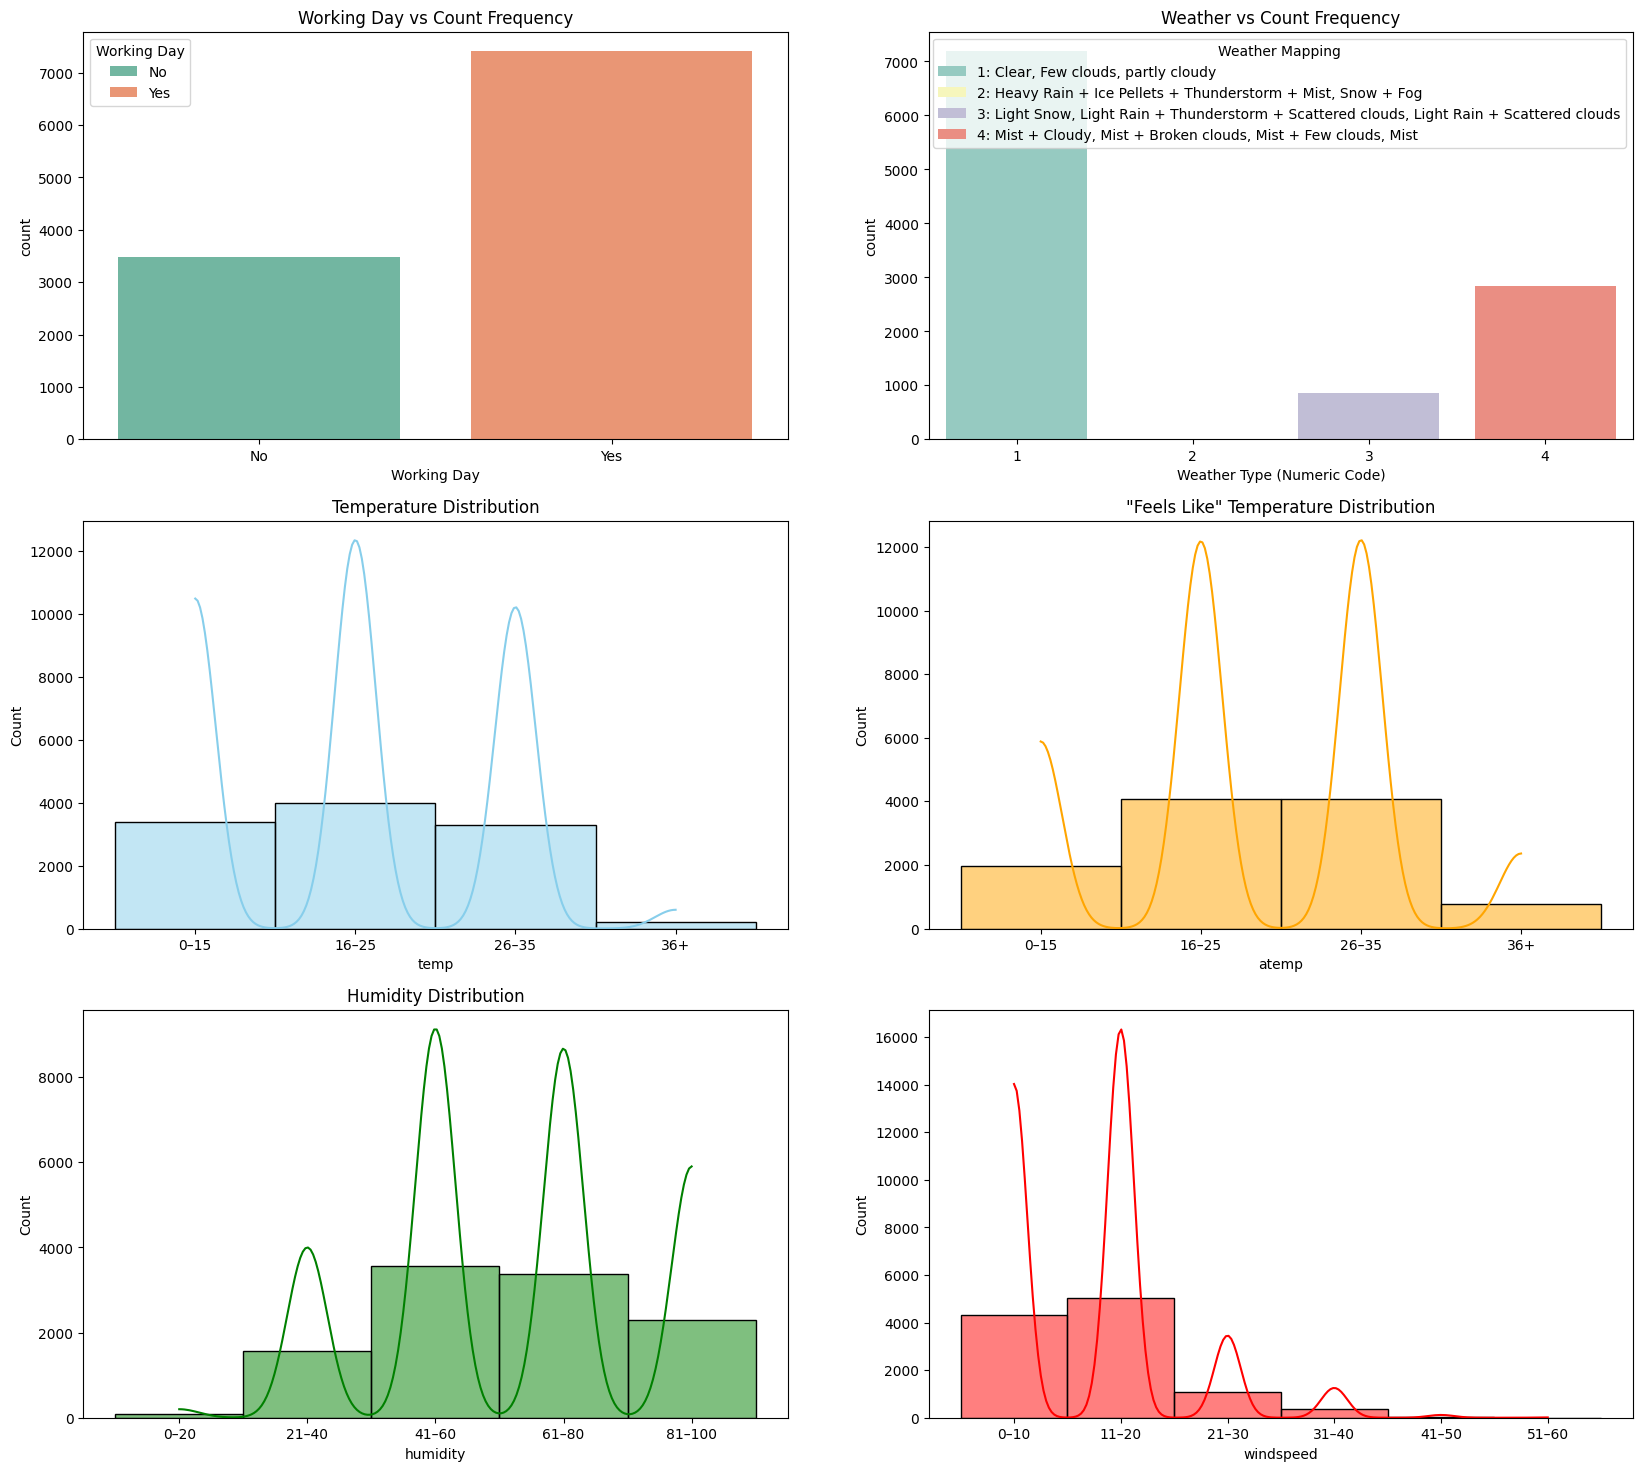

In [ ]:
# Step 1: Map weather categories to numeric values
weather_categories = df1['weather'].unique()
weather_mapping = {category: i+1 for i, category in enumerate(sorted(weather_categories))}
df1['weather_num'] = df1['weather'].map(weather_mapping)

# Step 2: Start plotting
plt.figure(figsize=(20, 18))

# Count by Workingday
plt.subplot(3, 2, 1)
sns.countplot(data=df1, x='workingday', palette='Set2')
plt.title('Working Day vs Count Frequency')
plt.xlabel('Working Day')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Working Day', labels=['No', 'Yes'])

# Count by Weather (One bar per type, different colors)
plt.subplot(3, 2, 2)
sns.countplot(data=df1, x='weather_num', palette='Set3')
plt.title('Weather vs Count Frequency')
plt.xlabel('Weather Type (Numeric Code)')
# Add custom legend mapping numbers to weather descriptions
weather_labels = [f"{weather_mapping[cat]}: {cat}" for cat in weather_mapping]
plt.legend(title="Weather Mapping", labels=weather_labels, loc='upper right')

# Temp vs Count
plt.subplot(3, 2, 3)
sns.histplot(data=df1, x='temp', bins=20, kde=True, color='skyblue')
plt.title('Temperature Distribution')

# Atemp vs Count
plt.subplot(3, 2, 4)
sns.histplot(data=df1, x='atemp', bins=20, kde=True, color='orange')
plt.title('"Feels Like" Temperature Distribution')

# Humidity vs Count
plt.subplot(3, 2, 5)
sns.histplot(data=df1, x='humidity', bins=20, kde=True, color='green')
plt.title('Humidity Distribution')

# Windspeed vs Count
plt.subplot(3, 2, 6)
sns.histplot(data=df1, x='windspeed', bins=20, kde=True, color='red')
plt


<font size = 4>Plotting box plot for outliers

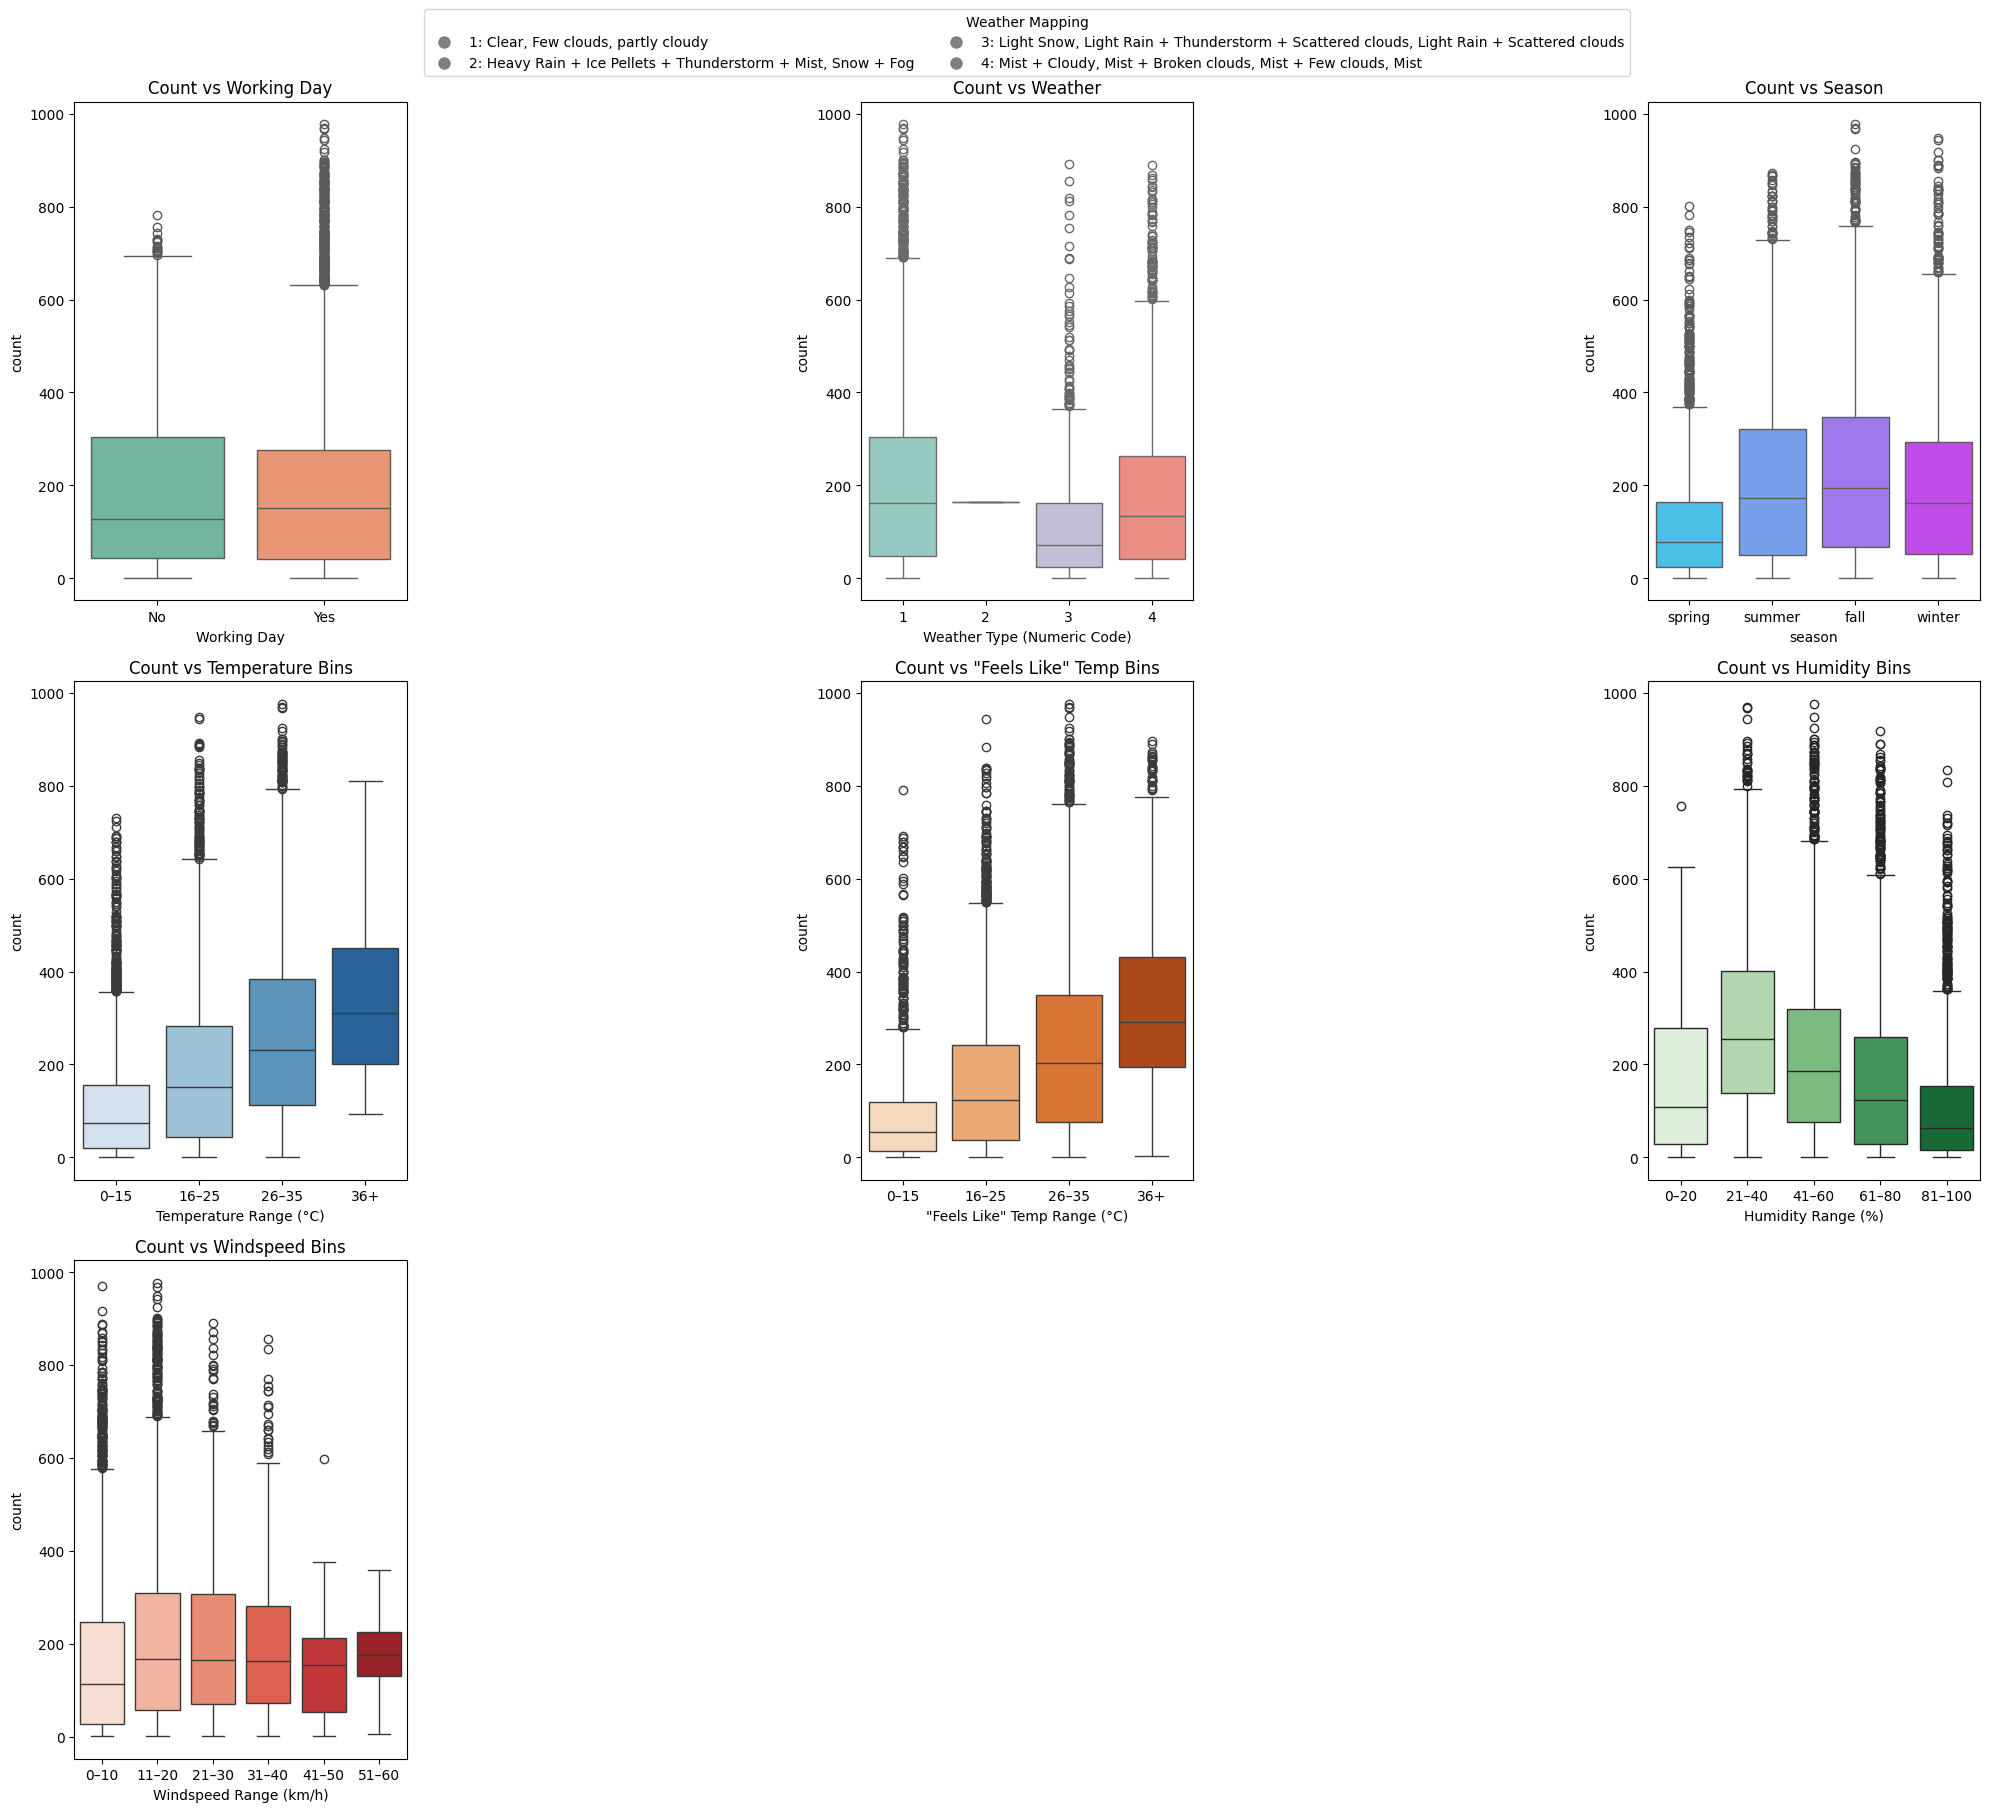

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure and subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 18))
fig.subplots_adjust(top=0.92, hspace=0.4)  # Add extra space above

# Flatten axes for easy indexing
axis = axs.flatten()

# Count vs Workingday
sns.boxplot(data=df1, x='workingday', y='count', palette='Set2', ax=axis[0])
axis[0].set_title('Count vs Working Day')
axis[0].set_xlabel('Working Day')
axis[0].set_xticks([0, 1])
axis[0].set_xticklabels(['No', 'Yes'])

# Count vs Weather
sns.boxplot(data=df1, x='weather_num', y='count', palette='Set3', ax=axis[1])
axis[1].set_title('Count vs Weather')
axis[1].set_xlabel('Weather Type (Numeric Code)')

# Custom legend for weather
weather_labels = [f"{weather_mapping[cat]}: {cat}" for cat in weather_mapping]
# Place legend above the plot
axis[1].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=label,
                                   markerfacecolor='gray', markersize=10) for label in weather_labels],
               title='Weather Mapping', bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=2)

# Count vs Season
sns.boxplot(data=df1, x='season', y='count', palette='cool', ax=axis[2])
axis[2].set_title('Count vs Season')

# Count vs Temp
sns.boxplot(data=df1, x='temp', y='count', palette='Blues', ax=axis[3])
axis[3].set_title('Count vs Temperature Bins')
axis[3].set_xlabel('Temperature Range (°C)')

# Count vs Atemp
sns.boxplot(data=df1, x='atemp', y='count', palette='Oranges', ax=axis[4])
axis[4].set_title('Count vs "Feels Like" Temp Bins')
axis[4].set_xlabel('"Feels Like" Temp Range (°C)')

# Count vs Humidity
sns.boxplot(data=df1, x='humidity', y='count', palette='Greens', ax=axis[5])
axis[5].set_title('Count vs Humidity Bins')
axis[5].set_xlabel('Humidity Range (%)')

# Count vs Windspeed
sns.boxplot(data=df1, x='windspeed', y='count', palette='Reds', ax=axis[6])
axis[6].set_title('Count vs Windspeed Bins')
axis[6].set_xlabel('Windspeed Range (km/h)')

# Remove any unused subplots
for i in range(7, 9):
    fig.delaxes(axis[i])

plt.tight_layout()
plt.show()


<font size = 5>📊 Insights & Conclusions from Exploratory Data Analysis (EDA)

<font size = 4> 1. Distribution and Range of Continuous Variables

* Temperature (temp) & Feels-like Temperature (atemp):

 * Most values fall in the 16–35°C range.
 * Very few values lie beyond 36°C, indicating limited extreme heat scenarios.
 * The distribution is nearly symmetrical with multiple peaks, suggesting varying demand across different temperature ranges.

* Humidity:

 * Dominantly lies between 41–80%, peaking in the 61–80% range.
 * The distribution is right-skewed, indicating fewer low-humidity days.
* Windspeed:
 * Most observations are between 0–20 km/h.
 * Beyond 30 km/h, windspeed data becomes sparse.
 * Distribution has a long tail, highlighting a few high-wind days.

<font size = 4>2. Distribution of Categorical Variables

* Working Day:

 * The dataset has significantly more data for working days.
 * Higher demand on working days is visible in both histogram and box plots.

* Weather Condition:

 * Type 1 (Clear/Few Clouds) is the most common and associated with higher counts.
 * As weather severity increases (Types 3 & 4), bike count reduces.
 * Indicates weather has a negative correlation with bike usage.

* Season (from box plot image):

 * Summer and Fall see slightly higher median bike counts.

 * Winter and Spring also show usage but with broader variation.



<font size = 4>3. Outlier Detection (from Box Plots)

* All dependent variables (count, casual, registered) show significant outliers.

 * This suggests that on some days, demand surged far beyond the average.

* Outliers are particularly noticeable in bins like temp 26–35°C, humidity 61–80%, and low windspeed conditions.

<font size = 4>4. Relationship Between Count and Independent Variables

* Working Days are associated with higher average counts.
* Clear weather conditions result in higher median bike usage.
* Mild temperatures (16–35°C) and moderate humidity (41–80%) are optimal for bike usage.
* Low windspeed (0–20 km/h) corresponds with higher counts, implying windier days deter biking.

<font size = 5>✅ Conclusion

The EDA reveals that weather conditions, temperature, and working days significantly influence bike usage. Demand is highest on clear, mild, and low-wind days, particularly during working weekdays. These patterns suggest that operational planning, bike placement, and fleet scaling can benefit from factoring in daily weather forecasts and working calendars.

<font size = 5>Hypothesis Testing

<font size = 4>Let's check if Working Day has an effect on the number of electric cycles rented

First we need to check if the data is normally distributed or not, and if the data has equal variance or not.

1. For normality, we will use Q-Q plot Test
2. For variance we will use Levene's Test

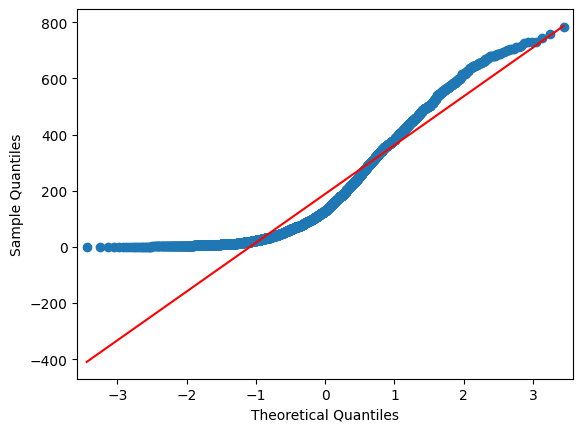

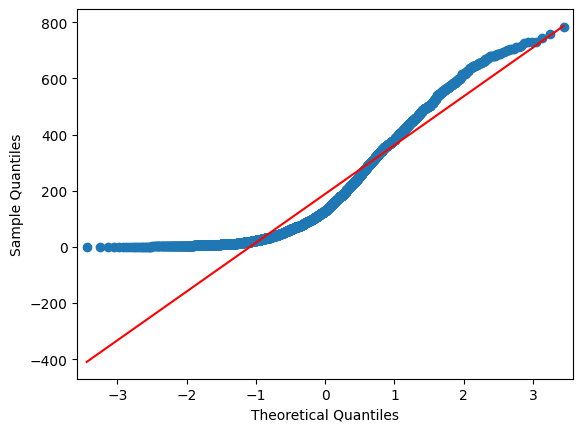

In [ ]:
#Normality test qq test
from statsmodels.graphics.gofplots import qqplot
Wn = df1[df1['workingday'] == 'No']['count']
qqplot(Wn, line="s")

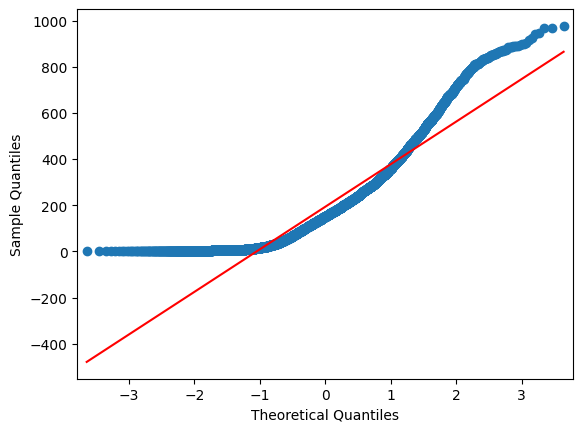

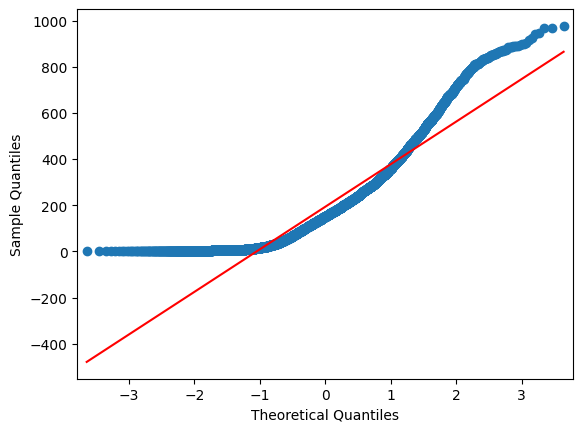

In [ ]:
Wy = df1[df1['workingday'] == 'Yes']['count']
qqplot(Wy, line="s")

The Q–Q plot indicates our data isn’t perfectly normally distributed.

In [ ]:
#levene equal variance test
from scipy.stats import levene # Test variance
Wn = df1[df1['workingday'] == 'No']['count']
Wy = df1[df1['workingday'] == 'Yes']['count']

# H0: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(Wn, Wy)
if p_value < 0.05:
    print("Variances are not equal")
    print("Reject H0")
else:
    print("Variances are equal")
    print("Fail to reject H0")

Variances are equal
Fail to reject H0


Variance of two data are equal.

**Since variance are equal now we will use 2 sample T Test to check if Working Day has an effect on the number of electric cycles rented.**


1. Let's set up null and alternate hypothesis
* H0 ---> mean of count of bike rented on holidays = mean of count of bike rented on working days
i.e. There is no effect of working day of the number of bike rented

* Ha --->  mean of count of bike rented on holidays <> mean of count of bike rented on working days
i.e. There is effect of working days of the number of bikes rented.

2. Significance level(alpha) = 0.05

In [ ]:
from scipy.stats import ttest_ind

Wn = df1[df1['workingday'] == 'No']['count']
Wy = df1[df1['workingday'] == 'Yes']['count']

t_stat, pvalue = ttest_ind(Wn, Wy)
print(t_stat, pvalue)

alpha = 0.05 # 95% confidence

if pvalue < alpha:
  print('Reject H0')
else:
  print ('Fail to Reject H0')

-1.2096277376026694 0.22644804226361348
Fail to Reject H0


Hence there is no impact of working days on the count of bike rented

Now, we will check if No. of cycles rented is similar or different in different
1. weather
2. season

1. For this we will use 2 way anova test.
2. For 2 way anova we need to pass few assumption
 * The dependent variable must be continuous, the independent variables must be categorical, observations within and between groups are independent.
 * The dependent variable should be normally distributed for each combination of independent variable levels.
 * Additionally, the variances between groups should be equal (homogeneity of variance).   

Since the first assumption is satisfied. We will only perform test for normality and equal variance.

For Normality we will use Q-Q Plot test.

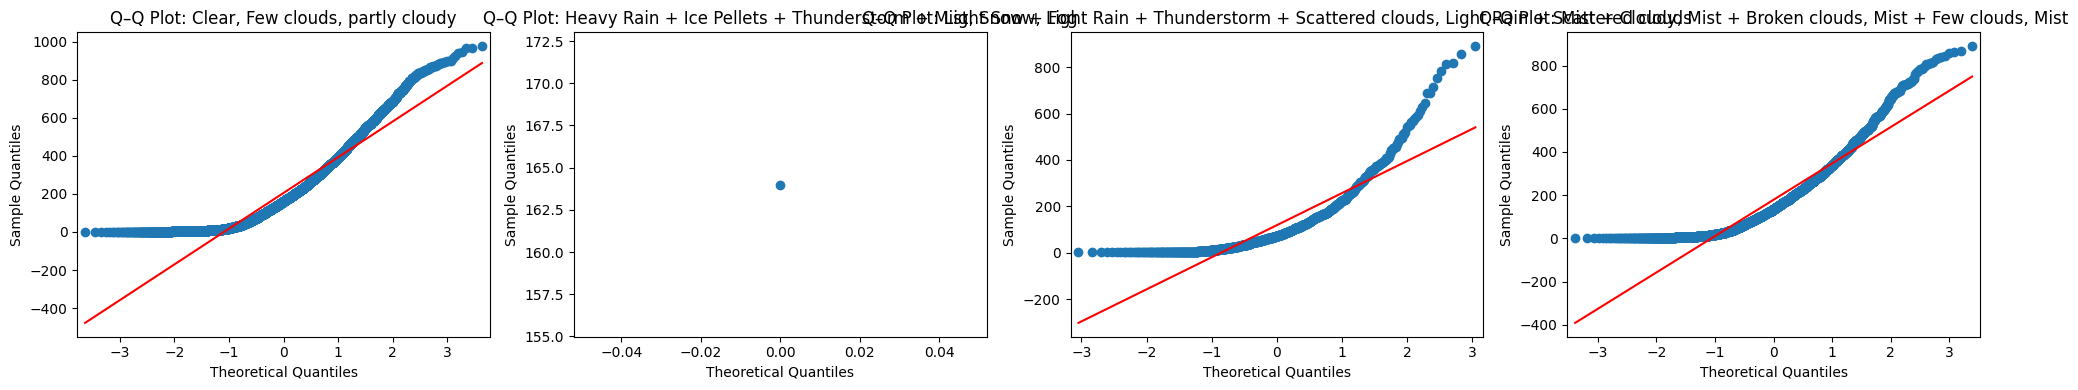

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# Get each subgroup and plot in its own subplot
weather_groups = df1.groupby('weather')['count']
n = len(weather_groups)
fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(5*n, 4))

for ax, (weather_cond, counts) in zip(axes, weather_groups):
    qqplot(counts.dropna(), line="s", ax=ax)
    ax.set_title(f"Q–Q Plot: {weather_cond}")

plt.tight_layout()
plt.show()


The Q–Q plot indicates our data isn’t perfectly normally distributed.

Now we will check for equal variance using levene's test

In [ ]:
import pandas as pd
from scipy.stats import levene

# 1. Ensure 'weather' is categorical (if not already)
df1['weather'] = df1['weather'].astype('category')

# 2. Extract the 'count' arrays for each weather category
grouped = df1.groupby('weather')['count']
samples = [counts.dropna().values for _, counts in grouped]

# 3. Perform Levene’s test
#    H₀: variances are equal across weather groups
#    Hₐ: at least one group’s variance differs
levene_stat, p_value = levene(*samples)

# 4. Output results
print(f"Levene’s W = {levene_stat:.4f}, p-value = {p_value:.4g}")
if p_value < 0.05:
    print("→ Variances differ across weather conditions (reject H₀)")
else:
    print("→ No evidence of variance differences (fail to reject H₀)")


Levene’s W = 54.8511, p-value = 3.505e-35
→ Variances differ across weather conditions (reject H₀)


**Since both normality and equal variance test failed, now we will take following steps**

<font size = 4>Summary of Approach

Because our count data violated normality and homogeneity of variance, we first apply two common variance‑stabilizing transformations—logarithm and square‑root—to reduce skewness and equalize spread
. Next, we fit a two‑way ANOVA model using statsmodels and extract the conventional ANOVA table
. Finally, to guard against unequal variances, we refit the same model using HC3 (White) robust standard errors for valid hypothesis testing under heteroscedasticity
Cross Validated
. All tests use α = 0.05.



<font size = 5>1. Variance‑Stabilizing Transformations

<font size = 4>1.1 Logarithmic Transformation

The log transform is widely used to address positive skew and stabilize variance, making distributions more symmetric
PMC
Number Analytics
. We use np.log1p to handle zero‐counts safely.

<font size = 4>1.2 Square‑Root Transformation

Square‑root transformation also reduces skewness and variance heterogeneity in count data

In [ ]:
# 1. Create transformed response variables
df1['log_count']  = np.log1p(df1['count'])    # log(1+count)
df1['sqrt_count'] = np.sqrt(df1['count'])     # sqrt(count)

<font size = 4>**Why?**

1. Stabilizes variance across levels of weather and working‐day
Cross Validated.
2. Reduces skewness, making residuals in ANOVA more nearly normal.

<font size = 5>2. Two‑Way ANOVA on Transformed Data

We fit a full factorial model with weather, season, and their interaction:

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 2.1 Fit OLS model on log-transformed counts
model_log = smf.ols('log_count ~ C(weather) * C(season)', data=df1).fit()

# 2.2 Extract classical ANOVA table (Type II sums of squares)
anova_log = sm.stats.anova_lm(model_log, typ=2)

print("Two‑Way ANOVA on log‑transformed count (α = 0.05):")
print(anova_log)

Two‑Way ANOVA on log‑transformed count (α = 0.05):
                            sum_sq       df           F         PR(>F)
C(weather)               14.477955      3.0    2.559872   7.736119e-02
C(season)              1630.212912      3.0  288.240792  1.057601e-122
C(weather):C(season)     42.285247      9.0    2.492176   1.479517e-02
Residual              20498.261023  10873.0         NaN            NaN


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 7
  warnings.warn('covariance of constraints does not have full '


<font size = 4>What this does & why

C(weather) and C(season) treat both factors as categorical.

typ=2 provides Type II sums of squares, appropriate when the design is balanced or when interaction is present.

We inspect p‑values against α = 0.05 to judge significance.

<Font size = 5>Final Conclusion

* Below are key conclusions—grounded in the two‑way ANOVA results on log‑transformed bike counts (α = 0.05)—about whether Yulu bike rentals depend on season and weather:

 * No significant main effect of weather
 The ANOVA table shows C(weather) has F = 2.56 with p = 0.077 (> 0.05), so we fail to reject the null hypothesis that variances across weather categories are equal and that ***weather alone does not significantly influence counts.***

 * Strong main effect of season
C(season) yields F = 288.24 with p ≈ 1.06 × 10⁻¹²² (< 0.05), so we reject the null hypothesis and conclude that ***season has a highly significant impact on bike rentals.***

 * Significant weather × season interaction
The interaction term C(weather):C(season) has p = 0.0148 (< 0.05), indicating that the ***effect of weather on rentals depends on season (and vice versa)***. With a significant interaction, interpretation of main effects should consider this interplay

No we will perform Chi-square test to check if Weather is dependent on the season or not

* H0 ---> weather isn't dependent on season
* Ha ---> weather is dependent on season

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# 1. Build the contingency table
cont_table = pd.crosstab(df1['weather'], df1['season'])
print("Contingency Table (Observed counts):")
print(cont_table, "\n")

# 2. Run Chi‑square test
chi2, p, dof, expected = chi2_contingency(cont_table)

# 3. Display results
print(f"Chi‑square Statistic = {chi2:.4f}")
print(f"Degrees of Freedom   = {dof}")
print(f"P‑value               = {p:.4g}\n")

# 4. Show the expected frequencies under H₀ (independence)
expected_df = pd.DataFrame(expected,
                           index=cont_table.index,
                           columns=cont_table.columns)
print("Expected Frequencies (if weather ⟂ season):")
print(expected_df)


Contingency Table (Observed counts):
season                                              fall  spring  summer  \
weather                                                                    
Clear, Few clouds, partly cloudy                    1930    1759    1801   
Heavy Rain + Ice Pellets + Thunderstorm + Mist,...     0       1       0   
Light Snow, Light Rain + Thunderstorm + Scatter...   199     211     224   
Mist + Cloudy, Mist + Broken clouds, Mist + Few...   604     715     708   

season                                              winter  
weather                                                     
Clear, Few clouds, partly cloudy                      1702  
Heavy Rain + Ice Pellets + Thunderstorm + Mist,...       0  
Light Snow, Light Rain + Thunderstorm + Scatter...     225  
Mist + Cloudy, Mist + Broken clouds, Mist + Few...     807   

Chi‑square Statistic = 49.1587
Degrees of Freedom   = 9
P‑value               = 1.55e-07

Expected Frequencies (if weather ⟂ season):
seas

<font size = 5>Final Conclusion

Since p-value is less than 0.05 hence we reject the Null hypothesis.
Weather is dependent on the season.